In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Over view

In [3]:
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')

In [4]:
df = pd.concat([df_train, df_test], ignore_index=True)
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,city,city_development_index,company_size,company_type,education_level,enrolled_university,enrollee_id,experience,gender,last_new_job,major_discipline,relevent_experience,target,training_hours
0,city_103,0.920,NaN,NaN,Graduate,no_enrollment,8949,>20,Male,1,STEM,Has relevent experience,1.0,36
1,city_40,0.776,50-99,Pvt Ltd,Graduate,no_enrollment,29725,15,Male,>4,STEM,No relevent experience,0.0,47
2,city_21,0.624,NaN,NaN,Graduate,Full time course,11561,5,NaN,never,STEM,No relevent experience,0.0,83
3,city_115,0.789,NaN,Pvt Ltd,Graduate,NaN,33241,<1,NaN,never,Business Degree,No relevent experience,1.0,52
4,city_162,0.767,50-99,Funded Startup,Masters,no_enrollment,666,>20,Male,4,STEM,Has relevent experience,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,city_103,0.920,NaN,Public Sector,Graduate,no_enrollment,1289,16,Male,4,Humanities,No relevent experience,NaN,15
21283,city_136,0.897,NaN,NaN,Masters,no_enrollment,195,18,Male,2,STEM,Has relevent experience,NaN,30
21284,city_100,0.887,NaN,Pvt Ltd,Primary School,no_enrollment,31762,3,Male,never,NaN,No relevent experience,NaN,18
21285,city_102,0.804,100-500,Public Sector,High School,Full time course,7873,7,Male,1,NaN,Has relevent experience,NaN,84


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
city                      21287 non-null object
city_development_index    21287 non-null float64
company_size              14727 non-null object
company_type              14513 non-null object
education_level           20775 non-null object
enrolled_university       20870 non-null object
enrollee_id               21287 non-null int64
experience                21217 non-null object
gender                    16271 non-null object
last_new_job              20824 non-null object
major_discipline          18162 non-null object
relevent_experience       21287 non-null object
target                    19158 non-null float64
training_hours            21287 non-null int64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.3+ MB


### Target is imbalanced or not

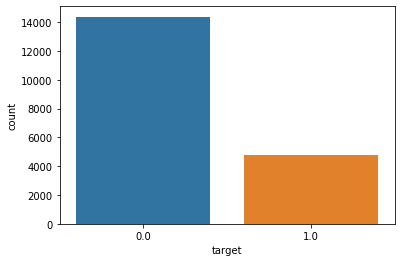

In [11]:
# sns.set_theme(style="darkgrid")
# titanic = sns.load_dataset(df)
ax = sns.countplot(data=df, x="target")

In [14]:
el = df['target'].value_counts().reset_index()
el

,index,target
0,0.0,14381
1,1.0,4777


### Balance factor (Entropy / log k)

In [56]:
def balanceFactor(seq):
    from collections import Counter
    from numpy import log2, log10, log
    
    n = len(seq)
    classes = [(clas,float(count)) for clas,count in Counter(seq).items()]
    k = len(classes)
    print('classes:', k)
    
    H = -sum([ (count/n) * log2((count/n)) for clas,count in classes]) #shannon entropy
    return H/log2(k)

In [58]:
entropy = balanceFactor(df_train['target'].to_list())
print("Balance Factor:", entropy)

classes: 2
Balance Factor: 0.8102423468931962


In [57]:
balanceFactor([1, 2, 3])

classes: 3


1.0

In [13]:
from numpy import log2
log2(2)

1.0

In [55]:
df['target'].to_list()[200:205]

[1.0, 0.0, 0.0, 0.0, 1.0]

In [59]:
df_train['target'].to_list().count(0)

14381

In [60]:
df_train['target'].to_list().count(1)

4777

In [63]:
listt = [1] * 14381 + [2] * 4777
balanceFactor(listt)

classes: 2


0.8102423468931962

### Other attribute

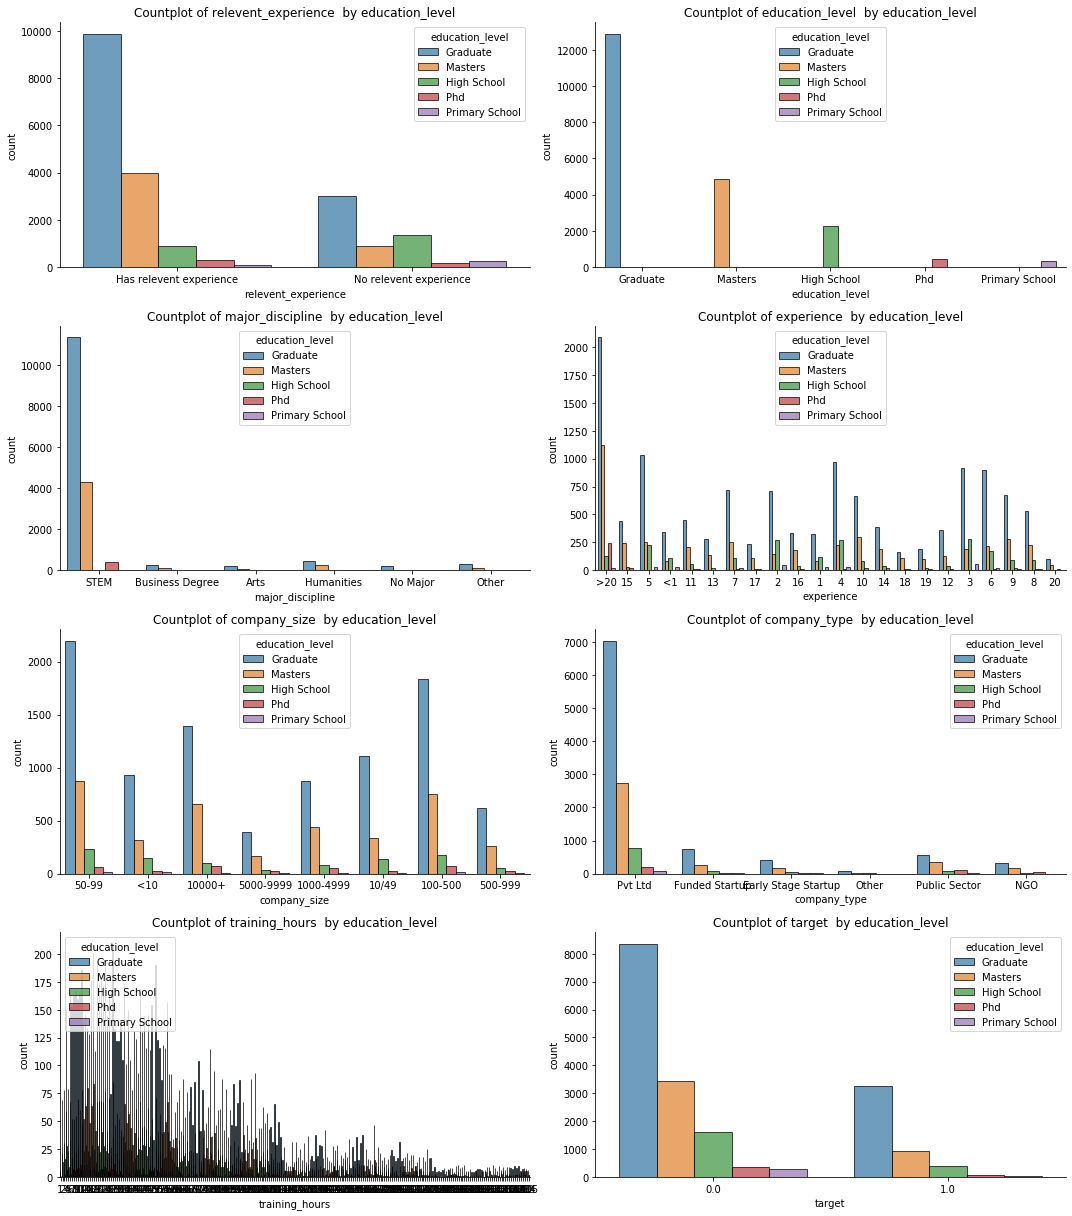

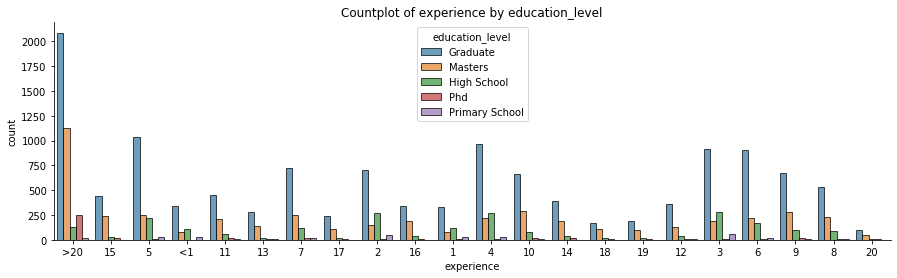

In [6]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,17])
fft=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours","target"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()